# CS 3110/5110: Data Privacy
## In-Class Exercises, week of 9/11/2023

In [4]:
# Load the data and libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

adult = pd.read_csv('https://github.com/jnear/cs3110-data-privacy/raw/main/homework/adult_with_pii.csv')

## Question 1

Write a *counting query* to determine whether or not Karrie Trusslove's age is 39.

In [5]:
def karrie_query():
    karries_row = adult[adult['Name'] == 'Karrie Trusslove']
    return karries_row[karries_row['Age'] == 39].shape[0]

In [6]:
# TEST CASE 

assert karrie_query() == 1

## Question 2

Add Laplace noise to the counting query you wrote in the last question to ensure differential privacy for $\epsilon = 1.0$.

In [9]:
sensitivity = 1 # Always sens 1 for counting query
epsilon = 1.0   # Spec

def dp_karrie_query():    
    karries_row = adult[adult['Name'] == 'Karrie Trusslove']
    return karries_row[karries_row['Age'] == 39].shape[0] + np.random.laplace(loc=0, scale=sensitivity/epsilon)

In [10]:
# TEST CASE 

q2_runs = [dp_karrie_query() for _ in range(100)]
noise_runs = [np.random.laplace(loc=1, scale=1/epsilon) for _ in range(100)]

assert stats.wasserstein_distance(q2_runs, noise_runs) < 1

## Question 3

In 2-4 sentences, describe how `dp_karrie_query` protects Karrie's privacy.

YOUR ANSWER HERE

## Question 4

Implement a function to construct an *empirical distribution* over random samples from the Laplace distribution with location 0 and scale `scale`. Use 1000 samples.

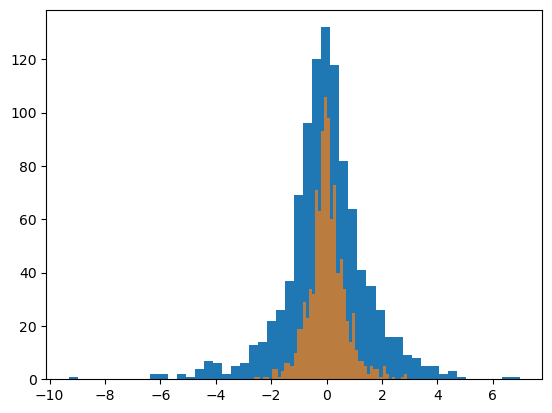

In [13]:
def empirical_dist_lap(scale):
    return [np.random.laplace(loc=0, scale=scale) for x in range(1000)]

epsilon1 = 1.0
epsilon2 = 2.0

plt.hist(empirical_dist_lap(1/epsilon1), bins=50);
plt.hist(empirical_dist_lap(1/epsilon2), bins=50, alpha=.7);

In [ ]:
# PLACEHOLDER for test cases


## Question 5

Consider the program below.

In [ ]:
counting_query = lambda: 1

result_1 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)
result_2 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon2)
result_3 = counting_query() + np.random.laplace(loc=0, scale=1/epsilon1)

print(result_1, result_2, result_3)

Write a function `total_epsilon` that returns the total privacy cost for this program.

In [ ]:
def total_epsilon():
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Placeholder for test case
